In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('../soccer17.csv')

# Problem 1: Goal Differentials

## 1a


In [3]:
def my_agg(data, league, year):
    '''
    First we will first filter to keep only those games in the EPL leauge that were played in 2017
    '''
    sub = data[(data['Div'] == league)&(data['Y'] == year)].copy()
    
    '''
    Next, we will create all the columns we need

    Game outcomes are acquired easily by comparing the scores in each game.
    With the boolean filtering technique I employ, each of the game outcomes 
    are each stored as booleans and parsed as integers. For instance, if a 
    HomeTeam won a game, they would have a 1 in the 'wins' column, and 0s in 
    'draws' and 'losses'

    Goal Differentials can be calulated by subtracting the AwayTeam score from 
    the HomeTeam score for each game.
    '''
    sub['wins'] = (sub['FTHG'] > sub['FTAG']).astype('int')
    sub['draws'] = (sub['FTHG'] == sub['FTAG']).astype('int')
    sub['losses'] = (sub['FTHG'] < sub['FTAG']).astype('int')
    sub['GoalDiff'] = sub['FTHG'] - sub['FTAG']
    
    
    '''
    We will now group by HomeTeam name and aggregate over the other values of interest
    We take the mean of goal differentials
    We take the count of pH as a proxy to count how many games each team played
    Because our wins, losses, and draws are represented as binary integers, we
    need only sum over them to calculate the total of each outcome for each team.
    We sort the values by 
    '''
    
    aagg = \
    sub.groupby('HomeTeam')\
    .agg({'GoalDiff':'mean', 'pH':'count','wins':'sum', 'losses':'sum','draws':'sum'})
    

    aagg = aagg.rename(columns = {'GoalDiff':'AvgGoalDiff', 'pH':'GamesPlayed'})
    
    bsub = data[(data['Div'] == league)&(data['Y'] == year)].copy()

    bsub['wins'] = (bsub['FTHG'] < bsub['FTAG']).astype('int')
    bsub['draws'] = (bsub['FTHG'] == bsub['FTAG']).astype('int')
    bsub['losses'] = (bsub['FTHG'] > bsub['FTAG']).astype('int')
    bsub['GoalDiff'] = bsub['FTAG'] - bsub['FTHG']
    bagg = (bsub.groupby('AwayTeam').agg({'GoalDiff':'mean', 'pH':'count','wins':'sum', 'losses':'sum','draws':'sum'}))

    bagg = bagg.rename(columns = {'GoalDiff':'AvgGoalDiff', 'pH':'GamesPlayed'})
    
    ans = (bagg+aagg).sort_values(by='AvgGoalDiff', ascending=False)
    
    return ans 
    

In [4]:
my_agg(data, 'EPL', 17)

,AvgGoalDiff,GamesPlayed,wins,losses,draws
AwayTeam,,,,,
Man City,4.157895,38,32,2,4
Liverpool,2.421053,38,21,5,12
Man United,2.105263,38,25,7,6
Tottenham,2.000000,38,23,7,8
Chelsea,1.263158,38,21,10,7
Arsenal,1.210526,38,19,13,6
Burnley,-0.157895,38,14,12,12
Leicester,-0.210526,38,12,15,11
Newcastle,-0.421053,38,12,18,8


## 1b

In [5]:
b_agg = my_agg(data, 'EPL', 17).copy()

In [6]:
'''
We need only multiply the wins column by 3, and add it to draws to get the 
number of points each team scored this y

Then, we sort the rows by Points in descending order
'''
b_agg['Points'] = b_agg['wins']*3 + b_agg['draws']
response_b = b_agg.sort_values(by='Points', ascending=False)

In [7]:
response_b

,AvgGoalDiff,GamesPlayed,wins,losses,draws,Points
AwayTeam,,,,,,
Man City,4.157895,38,32,2,4,100
Man United,2.105263,38,25,7,6,81
Tottenham,2.000000,38,23,7,8,77
Liverpool,2.421053,38,21,5,12,75
Chelsea,1.263158,38,21,10,7,70
Arsenal,1.210526,38,19,13,6,63
Burnley,-0.157895,38,14,12,12,54
Everton,-0.736842,38,13,15,10,49
Leicester,-0.210526,38,12,15,11,47


## 1c


In [8]:
'''
First we make a list of leagues 
'''
leagues = list(data['Div'].unique())

In [9]:
tables = []
for l in leagues:
    '''
    Since my_agg sorts by descending AvgGoalDiff, we need only take the first 3 rows
    '''
    table = my_agg(data, l, 17)[:3]
    table['Div'] = [l]*3
    tables.append(table)
response_c = pd.concat(tables).sort_values('Div')

In [10]:
response_c

,AvgGoalDiff,GamesPlayed,wins,losses,draws,Div
AwayTeam,,,,,,
Bayern Munich,3.764706,34,27,4,3,Bundesliga
Hoffenheim,1.058824,34,15,9,10,Bundesliga
Dortmund,1.000000,34,15,9,10,Bundesliga
Man City,4.157895,38,32,2,4,EPL
Liverpool,2.421053,38,21,5,12,EPL
Man United,2.105263,38,25,7,6,EPL
Barcelona,3.684211,38,28,1,9,La_Liga
Real Madrid,2.631579,38,22,6,10,La_Liga
Ath Madrid,1.894737,38,23,5,10,La_Liga


# 2: Goal Scoring

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import gamma, invgamma, invweibull
all_data = data.copy()

In [12]:
all_goals = all_data['FTHG'] + all_data['FTAG']

In [13]:
len(all_goals)

7304

## 2a

Upon looking at the histogram of the data, I observed that it was left-leaning. I know that gamma distributions can model that kind of data, so I chose that. 

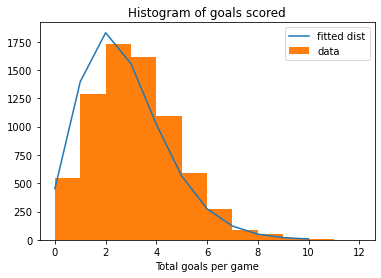

In [14]:
x = np.linspace(0,10,11)
binwid=1

a, loc, scale = gamma.fit(all_goals)
dist = gamma(a, loc, scale)

fig, ax = plt.subplots(1,1)
ax.plot(x, dist.pdf(x)*len(all_goals), label = 'fitted dist')
ax.hist(all_goals, 
        bins = range(
            min(all_goals), 
            max(all_goals)+binwid, 
            binwid), 
        label = 'data' )

ax.set_xlabel('Total goals per game')
ax.set_title('Histogram of goals scored')
plt.legend(loc='upper right')
plt.show()

## 2b

When looking at only the first half goals, I found a similar left-oriented pattern. However, when I tried to model the data with the gamma distribution, it's value exploded at zero. I assumed that there was some issue computationally with the function of the distribution, and tried using the inverse gamma. I got a runtime warning that i was dividing by zero at 0, but it was able to model the data. 

In [15]:
fh_goals = (all_data['HTHG'] + all_data['HTAG'])

/Users/williamegan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


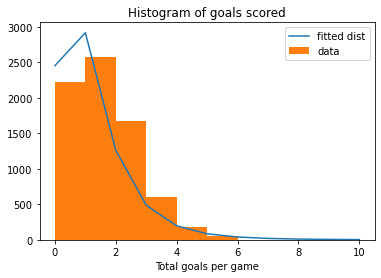

In [16]:
x = np.linspace(0,10,11)
binwid=1

a, loc, scale = invgamma.fit(fh_goals)
dist = invgamma(a, loc, scale)

fig, ax = plt.subplots(1,1)
ax.plot(x, dist.pdf(x)*len(fh_goals), label = 'fitted dist')
ax.hist(fh_goals, 
        bins = range(
            min(fh_goals), 
            max(fh_goals)+binwid, 
            binwid), 
        label = 'data' )

ax.set_xlabel('Total goals per game')
ax.set_title('Histogram of goals scored')
plt.legend(loc='upper right')
plt.show()

## 2c

Points scored in the second half of the game looked very similar to the points scored in the first half of the game. I used the same inverse gamma function. 

In [17]:
sh_goals = (all_data['FTHG'] + all_data['FTAG']) - (all_data['HTHG'] + all_data['HTAG'])

/Users/williamegan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


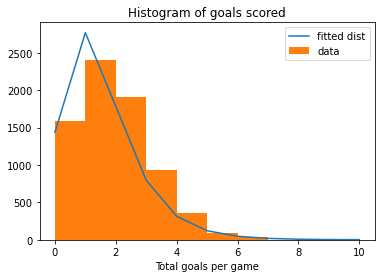

In [18]:
x = np.linspace(0,10,11)
binwid=1

a, loc, scale = invgamma.fit(sh_goals)
dist = invgamma(a, loc, scale)

fig, ax = plt.subplots(1,1)
ax.plot(x, dist.pdf(x)*len(fh_goals), label = 'fitted dist')
ax.hist(sh_goals, 
        bins = range(
            min(sh_goals), 
            max(sh_goals)+binwid, 
            binwid), 
        label = 'data' )

ax.set_xlabel('Total goals per game')
ax.set_title('Histogram of goals scored')
plt.legend(loc='upper right')
plt.show()

## d

In [19]:
all_data['TotalGoals'] = all_data['FTHG'] + all_data['FTAG']

In [20]:
all_data

,Div,Date,Y,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,pH,pD,pA,TotalGoals
0,EPL,2014-08-16,14,Arsenal,Crystal Palace,2,1,1,1,0.778038,0.151989,0.069973,3
1,EPL,2014-08-16,14,Leicester,Everton,2,2,1,2,0.311972,0.289820,0.398208,4
2,EPL,2014-08-16,14,Man United,Swansea,1,2,0,1,0.715373,0.192169,0.092459,3
3,EPL,2014-08-16,14,QPR,Hull,0,1,0,0,0.395113,0.300577,0.304311,1
4,EPL,2014-08-16,14,Stoke,Aston Villa,0,1,0,0,0.502378,0.282316,0.215305,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,Ligue_1,2018-04-27,17,Montpellier,St Etienne,0,1,0,1,0.376633,0.308696,0.314671,1
7300,Ligue_1,2018-04-29,17,Angers,Marseille,1,1,0,1,0.229855,0.259890,0.510255,2
7301,Ligue_1,2018-04-29,17,Paris SG,Guingamp,2,2,0,1,0.877408,0.086146,0.036446,4
7302,Ligue_1,2018-04-29,17,Rennes,Toulouse,2,1,1,1,0.510835,0.273304,0.215862,3


In [21]:
goals_and_games = all_data.groupby('Div')\
.agg({'TotalGoals':'mean', 'Date':'count'})\
.sort_values('TotalGoals', ascending=False)\
.rename(columns = {'TotalGoals':'AverageGoalsPerGame', 'Date':'TotalGamesPlayed'})

In [22]:
goals_and_games

,AverageGoalsPerGame,TotalGamesPlayed
Div,,
Bundesliga,2.811275,1224
La_Liga,2.759211,1520
Serie_A,2.725658,1520
EPL,2.686184,1520
Ligue_1,2.588158,1520


## 2e

In [23]:
all_data

,Div,Date,Y,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,pH,pD,pA,TotalGoals
0,EPL,2014-08-16,14,Arsenal,Crystal Palace,2,1,1,1,0.778038,0.151989,0.069973,3
1,EPL,2014-08-16,14,Leicester,Everton,2,2,1,2,0.311972,0.289820,0.398208,4
2,EPL,2014-08-16,14,Man United,Swansea,1,2,0,1,0.715373,0.192169,0.092459,3
3,EPL,2014-08-16,14,QPR,Hull,0,1,0,0,0.395113,0.300577,0.304311,1
4,EPL,2014-08-16,14,Stoke,Aston Villa,0,1,0,0,0.502378,0.282316,0.215305,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,Ligue_1,2018-04-27,17,Montpellier,St Etienne,0,1,0,1,0.376633,0.308696,0.314671,1
7300,Ligue_1,2018-04-29,17,Angers,Marseille,1,1,0,1,0.229855,0.259890,0.510255,2
7301,Ligue_1,2018-04-29,17,Paris SG,Guingamp,2,2,0,1,0.877408,0.086146,0.036446,4
7302,Ligue_1,2018-04-29,17,Rennes,Toulouse,2,1,1,1,0.510835,0.273304,0.215862,3


We not only want games that go to 4, but also that have relatively close pH and pA values. I chose to use a threshold of 0.05. Under these coditions we get 83 games

In [24]:

games4 = all_data[(all_data['TotalGoals'] == 4)&(abs(all_data['pH'] - all_data['pA']) < 0.05)]
games4

,Div,Date,Y,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,pH,pD,pA,TotalGoals
13,EPL,2014-08-23,14,Everton,Arsenal,2,2,2,0,0.360502,0.284222,0.355277,4
26,EPL,2014-08-30,14,West Ham,Southampton,1,3,1,1,0.349991,0.285707,0.364303,4
43,EPL,2014-09-20,14,QPR,Stoke,2,2,1,1,0.353200,0.310592,0.336208,4
71,EPL,2014-10-18,14,Burnley,West Ham,1,3,0,0,0.346271,0.290786,0.362943,4
167,EPL,2014-12-21,14,Liverpool,Arsenal,2,2,1,1,0.352679,0.273105,0.374216,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6636,Serie_A,2016-11-20,16,Milan,Inter,2,2,1,0,0.338957,0.306121,0.354922,4
6764,Serie_A,2017-02-26,16,Inter,Roma,1,3,0,1,0.379770,0.282365,0.337865,4
6949,Serie_A,2017-09-30,17,Udinese,Sampdoria,4,0,1,0,0.347534,0.296086,0.356380,4
6965,Serie_A,2017-10-15,17,Sampdoria,Atalanta,3,1,0,1,0.335640,0.287410,0.376950,4


To show that there is comeback tendency, we want to show that more than half of the 83 games (83/2  = 41.5) were draws. We do in fact find that 43 of these games were draws of 2-2

In [25]:
#evidence of comeback tendency would be over half of these games are draws. 
#171/2=85.5 oh no!
len(games4[(games4['FTHG']==2)])#|((games4['HTHG'] == 1)&(games4['HTAG']==1))])

43